# Now let's make some stunning plots with the data we collected. 
# These will be nice to display on YouTube. 

### First load data.

In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
df_championships_by_team = pd.read_csv('teams_championships_won.csv')
df_championships_by_seed = pd.read_csv('championships_by_seed.csv')
df_championships_by_year = pd.read_csv('championships_by_year.csv')

# Initialize empty dictionaries to store the DataFrames
dataframes_lists = {}
dataframes_champs = {}

# Define the range of years
years = range(2010, 2025)

# Read CSV files into dataframes_lists
for year in years:
    if year != 2020:
        filename = f"dataframes_lists_{year}.csv"
        dataframes_lists[year] = pd.read_csv(filename)

# Read CSV files into dataframes_champs
for year in years:
    if year != 2020:
        filename = f"dataframes_champs_{year}.csv"
        dataframes_champs[year] = pd.read_csv(filename)

import os

# Path to the folder containing the CSV files
folder_path = 'athlete_csvs'

# Initialize a dictionary to store the DataFrames, keyed by file name
dataframes = {}

# List all files in the directory
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file into a DataFrame
        dataframes[filename] = pd.read_csv(file_path)

# Now you have a dictionary of DataFrames, each keyed by its CSV file name
print(dataframes['Adam_Blue.csv'])



   Year  Mark
0     1  4.90
1     2  5.12


### Let's make a boxplot for year vs mark.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


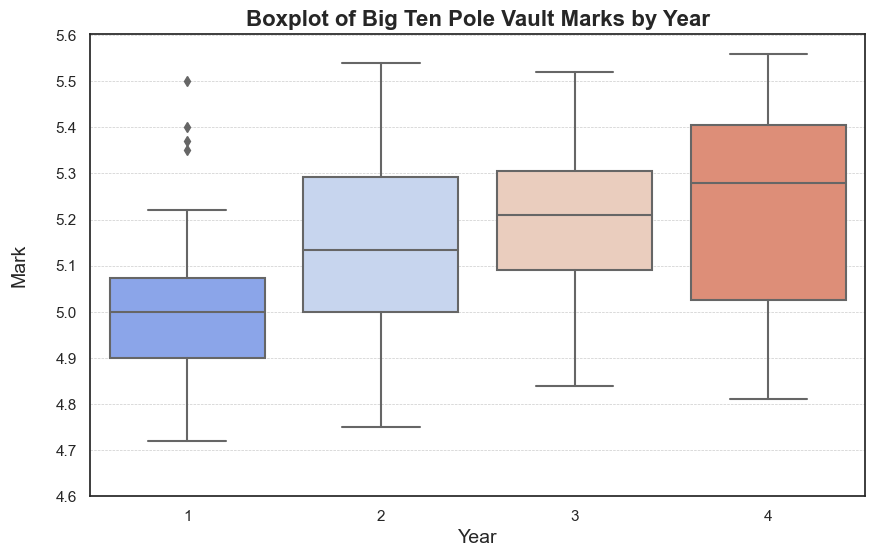

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming each DataFrame has columns for the variables you want to plot, e.g., 'x' and 'y'
# Concatenate all DataFrames into one, adding an 'Athlete' column
all_data = pd.DataFrame()
for filename, df in dataframes.items():
    df['Athlete'] = filename.replace('.csv', '')  # Remove .csv from filename for clarity
    all_data = pd.concat([all_data, df], ignore_index=True)

# Plot using seaborn
plt.figure(figsize=(10, 6), facecolor='white')  # Set figure background to white
sns.set_theme(style="white", rc={"axes.facecolor": "white", "figure.facecolor": "white"}) 

# Plot an average trendline
sns.boxplot(data=all_data, x='Year', y='Mark', palette='coolwarm')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mark', fontsize=14, labelpad=20)

plt.legend().remove()
plt.title('Boxplot of Big Ten Pole Vault Marks by Year', fontsize=16, fontweight='bold')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

y_start, y_end = 4.60, 5.60
y_ticks = np.arange(y_start, y_end + 0.10, 0.10)  # Ensure the end value is inclusive
plt.yticks(y_ticks)
plt.show()


### Note that only the freshman class has outliers. It seems that some athletes make large improvements in their later years and catch up, whereas others start strong and stay there. 

### Now let's take a look at how the Big Ten changes over time. 

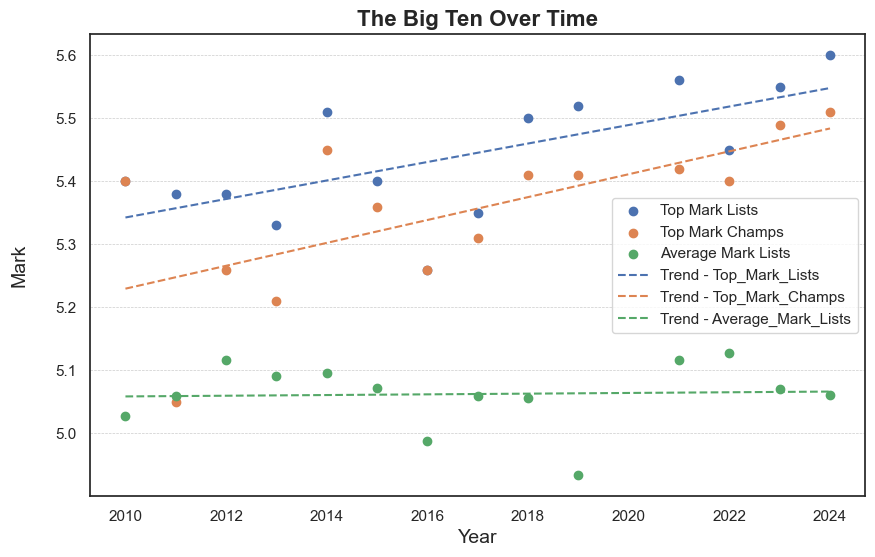

In [9]:
import warnings
# Suppress FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

results_df = pd.DataFrame(columns=['Year', 'Top_Mark_Lists', 'Average_Mark_Lists', 'Top_Mark_Champs'])

for year in years:
    if year != 2020:
        # Calculate for dataframes_lists
        top_mark_lists = dataframes_lists[year]['Mark'].max()
        average_mark_lists = dataframes_lists[year]['Mark'].mean()
        
        # Calculate for dataframes_champs
        top_mark_champs = dataframes_champs[year]['Mark'].max()
        average_mark_champs = dataframes_champs[year]['Mark'].mean()
        
        # Append to results_df
        results_df = results_df.append({'Year': year, 
                                        'Top_Mark_Lists': top_mark_lists, 
                                        'Top_Mark_Champs': top_mark_champs,
                                        'Average_Mark_Lists': average_mark_lists}, ignore_index=True)

# Plotting
plt.figure(figsize=(10, 6))
 

# Scatter plots
plt.scatter(results_df['Year'], results_df['Top_Mark_Lists'], label='Top Mark Lists', marker='o', alpha=1)
plt.scatter(results_df['Year'], results_df['Top_Mark_Champs'], label='Top Mark Champs', marker='o',alpha=1)
plt.scatter(results_df['Year'], results_df['Average_Mark_Lists'], label='Average Mark Lists', marker='o',alpha=1)

# Trendlines
for column in ['Top_Mark_Lists', 'Top_Mark_Champs', 'Average_Mark_Lists', ]:
    z = np.polyfit(results_df['Year'], results_df[column], 1)
    p = np.poly1d(z)
    plt.plot(results_df['Year'], p(results_df['Year']), linestyle='dashed', label=f'Trend - {column}')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Mark', fontsize=14, labelpad=20)
plt.title('The Big Ten Over Time',fontsize=16, fontweight='bold')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

legend = plt.legend()
for text in legend.get_texts():
    text.set_alpha(1)
plt.show()




### Both the top mark in the lists and the top mark to win the championship are steadily increasing over the years.
### These two trendlines are also converging. However, I believe this is due to the outlier 5.05m winning the 2011 championship. Excluding this point, the top mark in the lists is consistently 5-10 cm higher than that in the championships. 
### However, the average mark in the lists remains around 5.05m. I had thought I'd like to make an overlapping bell curve diagram, but I don't think it would be too interesting.

### Lastly, I think I'll make basic charts for the data we found in chancenshow. 

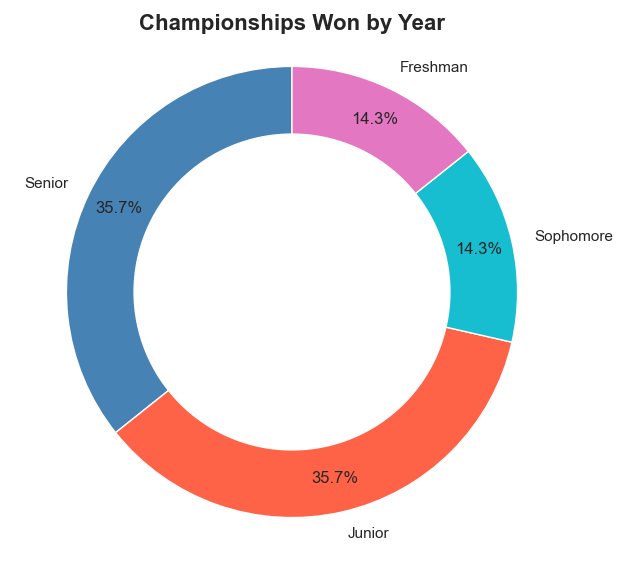

In [18]:
import matplotlib.pyplot as plt

# Assuming 'Year' is the year in school and 'Championships Won' is the number of championships won
years = df_championships_by_year['Year']
championships_won = df_championships_by_year['Championships Won']

# Map numeric years to labels
year_labels = years.map({1: 'Freshman', 2: 'Sophomore', 3: 'Junior', 4: 'Senior'})

# Custom color palette
# Unusual custom color palette
colors = ['#4682b4',  # Steel blue
          '#ff6347',  # Tomato
          '#17becf',  # Cyan
          '#e377c2']  # Pink


# Create the donut chart with the custom color palette
plt.figure(figsize=(8, 6))
plt.pie(championships_won, labels=year_labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=colors)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title('Championships Won by Year', fontsize=16, fontweight='bold', y=0.95)
plt.show()

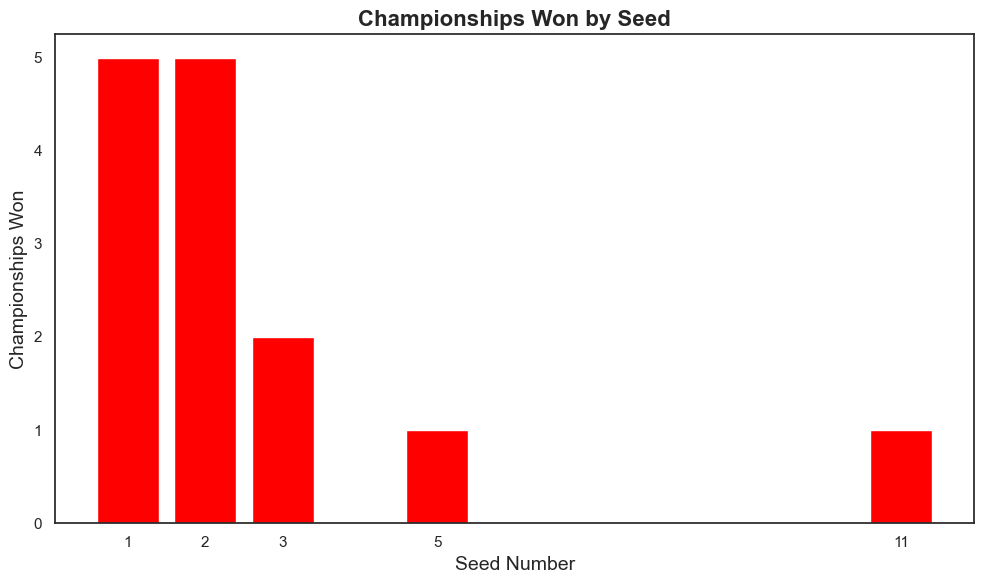

In [19]:
import matplotlib.pyplot as plt

# Extracting data
seeds = df_championships_by_seed['Seed']
championships_won = df_championships_by_seed['Championships Won']

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(seeds, championships_won, color='red')

# Adding title and labels
plt.title('Championships Won by Seed', fontsize=16, fontweight='bold')
plt.xlabel('Seed Number', fontsize=14)
plt.ylabel('Championships Won', fontsize=14)

# Displaying the plot
plt.xticks()  # Rotate seed labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.xticks(seeds)
plt.show()

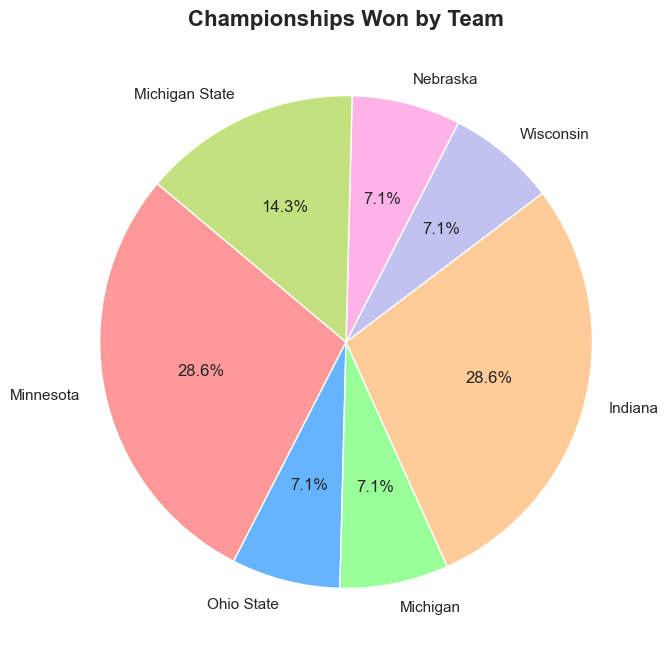

In [20]:
# Import necessary library
import matplotlib.pyplot as plt

# Data preparation
team_names = df_championships_by_team['Team']  # Assuming 'Team' contains team names or IDs
championships_won = df_championships_by_team['Championships Won']

# Define a list of colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6', '#c4e17f', '#76d7c4', '#f7dc6f', '#92a8d1']

# Create the pie plot with the new color scheme
plt.figure(figsize=(8, 8))
plt.pie(championships_won, labels=team_names, autopct='%1.1f%%', startangle=140, colors=colors)

# Add a title
plt.title('Championships Won by Team',fontsize=16,fontweight='bold')

# Show plot
plt.show()

### And that concludes the jupyter notebook for the Big Ten men's pole vault.
### Be on the lookout for the corresponding YouTube video to be posted @jakurlacher.